# EDTS Project : Modeling effective connectivity in high-dimensional cortical source signals

**Athors :** Anass El Yaagoubi, Assvin Tharmarajah


- **Original paper :** Yuxiao Wang, Chee-Ming Ting, Hernando Ombao https://ieeexplore.ieee.org/document/7542588
- **Original data  :** Neuropulse Mindset, Colorado State University http://www.cs.colostate.edu/eeg/main/data/2011-12_BCI_at_CSU


In [1]:
from statsmodels.tsa.api import VAR, DynamicVAR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

import warnings
warnings.filterwarnings('ignore')

## Loading the data in the JSON format

In [2]:
dataMindset = json.load(open('./eeg/s20-mindset-gifford-unimpaired.json','r'))

In [3]:
eegMindset = np.array(dataMindset[0]['eeg']['trial 1'])

In [4]:
X = np.array(dataMindset[0]['eeg']['trial 1'])[:19,:]
X = X.transpose()

channels = dataMindset[0]['channels']

In [5]:
X.shape

(92160, 19)

In [6]:
X_light = X[:20000,:]

In [7]:
print('Light sub dataset : ', X_light.shape)
print('Orinal Data       : ', X.shape)

Light sub dataset :  (20000, 19)
Orinal Data       :  (92160, 19)


## Visualizing a fragment of the data

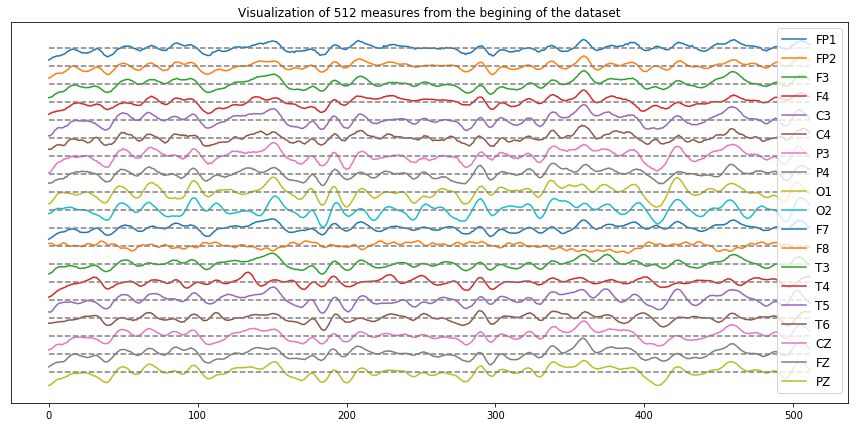

In [8]:
plt.figure(figsize=(15, 7))

plt.title('Visualization of 512 measures from the begining of the dataset')
plt.plot(X[1000:1512,:] + 30*np.arange(18,-1,-1))
plt.plot(np.zeros((512,19)) + 30*np.arange(18,-1,-1),'--',color='gray')

plt.yticks([])

plt.legend(channels, prop={'size':12})
plt.axis('tight')
plt.savefig('./images/eegTimeSeries.png', bbox_inches = 'tight')
plt.show()

## Fitting a first naive VAR model on the light dataset

In [9]:
model = VAR(X_light)

In [10]:
results = model.fit(3)

In [11]:
# Parameters of the model and results
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Dec, 2018
Time:                     07:42:25
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                   -47.1001
Nobs:                     19997.0    HQIC:                  -47.3932
Log likelihood:          -62728.4    FPE:                2.26738e-21
AIC:                     -47.5357    Det(Omega_mle):     2.14598e-21
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.017770         0.006907           -2.573           0.010
L1.y1          0.713808         0.008518           83.802           0.000
L1.y2          1.008753         0.020593           48.985           0.000
L1.y3          0.

### Quick comparison of predictions vs real data

<Figure size 432x288 with 0 Axes>

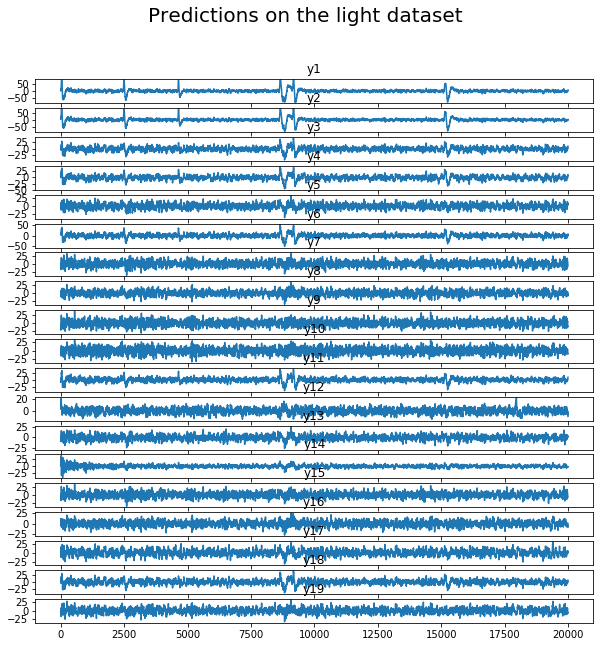

In [12]:
plt.figure()
results.plot()
plt.suptitle('Predictions on the light dataset', fontsize=20)
plt.show()

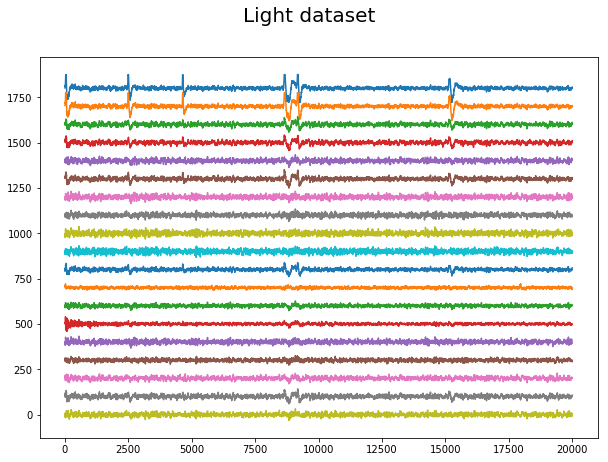

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(X_light + 100*np.arange(18,-1,-1))
plt.suptitle('Light dataset', fontsize=20)
plt.show()

### Autocorrelation of residuals

In [14]:
# plt.figure(figsize=(100,100))
# results.plot_acorr()
# plt.savefig('./images/residuals.png')
# plt.show()

## Model selection : Akaike Information Criterion

In [15]:
order = model.select_order(50)

In [16]:
# In order to see evolution of the AIC W.R.T. P
# order.summary()
order.selected_orders

{'aic': 24, 'bic': 12, 'hqic': 16, 'fpe': 24}

In [17]:
print('Selected order using AIC : ', order.selected_orders['aic'])

Selected order using AIC :  24


In [18]:
results = model.fit(order.selected_orders['aic'])